<a href="https://colab.research.google.com/github/surajacharya12/data-science-/blob/main/Another_copy_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
import google.generativeai as genai
import re
import os
from sklearn.linear_model import LinearRegression


# Step 1: Load the Dataset
First, we need to load the dataset into a Pandas DataFrame.

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
data = pd.read_csv(url)

In [4]:
data.head()


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


from matplotlib import pyplot as plt
_df_0['1980'].plot(kind='hist', bins=20, title='1980')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['1981'].plot(kind='hist', bins=20, title='1981')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['1982'].plot(kind='hist', bins=20, title='1982')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['1983'].plot(kind='hist', bins=20, title='1983')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Continent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('DevName').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='1980', y='1981', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='1981', y='1982', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='1982', y='1983', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='1983', y='1984', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['1980'].plot(kind='line', figsize=(8, 4), title='1980')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['1981'].plot(kind='line', figsize=(8, 4), title='1981')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['1982'].plot(kind='line', figsize=(8, 4), title='1982')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['1983'].plot(kind='line', figsize=(8, 4), title='1983')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Continent'].value_counts()
    for x_label, grp in _df_16.groupby('Country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Country')
_ = plt.ylabel('Continent')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Region'].value_counts()
    for x_label, grp in _df_17.groupby('Continent')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Continent')
_ = plt.ylabel('Region')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['DevName'].value_counts()
    for x_label, grp in _df_18.groupby('Region')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Region')
_ = plt.ylabel('DevName')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='1980', y='Country', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Continent'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='1980', y='Continent', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='1980', y='Region', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['DevName'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='1980', y='DevName', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Step 2: Data Cleaning



Data cleaning involves handling missing values, removing duplicates, and ensuring data types are correct.


In [5]:
# Check for missing values, duplicates, and data types
missing_values = data.isnull().sum()

duplicates = data.duplicated().sum()

data_types = data.dtypes

missing_values, duplicates, data_types

(Country      0
 Continent    0
 Region       0
 DevName      0
 1980         0
 1981         0
 1982         0
 1983         0
 1984         0
 1985         0
 1986         0
 1987         0
 1988         0
 1989         0
 1990         0
 1991         0
 1992         0
 1993         0
 1994         0
 1995         0
 1996         0
 1997         0
 1998         0
 1999         0
 2000         0
 2001         0
 2002         0
 2003         0
 2004         0
 2005         0
 2006         0
 2007         0
 2008         0
 2009         0
 2010         0
 2011         0
 2012         0
 2013         0
 Total        0
 dtype: int64,
 0,
 Country      object
 Continent    object
 Region       object
 DevName      object
 1980          int64
 1981          int64
 1982          int64
 1983          int64
 1984          int64
 1985          int64
 1986          int64
 1987          int64
 1988          int64
 1989          int64
 1990          int64
 1991          int64
 1992          int64


If there are any missing values, we will fill them or drop the rows. If there are duplicates, we will remove them.


1.We identify numeric columns using select_dtypes() and apply .fillna() to them.
2.For categorical columns (like "Country" or "Region"), we fill missing values with the most frequent value (mode).
3.Finally, we drop any duplicates from the datas

In [6]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

data.drop_duplicates(inplace=True)


<ipython-input-6-7673697eb828>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


This section cleans the data by:


1.   Checking for missing values, duplicates, and data types.
2.   Filling missing numeric values with the mean.







3.   Filling missing categorical values with the mode.
2.   Removing duplicate rows.



# 3. Exploratory Data Analysis (EDA) and Visualization
 We'll explore basic statistics and visualize the data.**bold text**

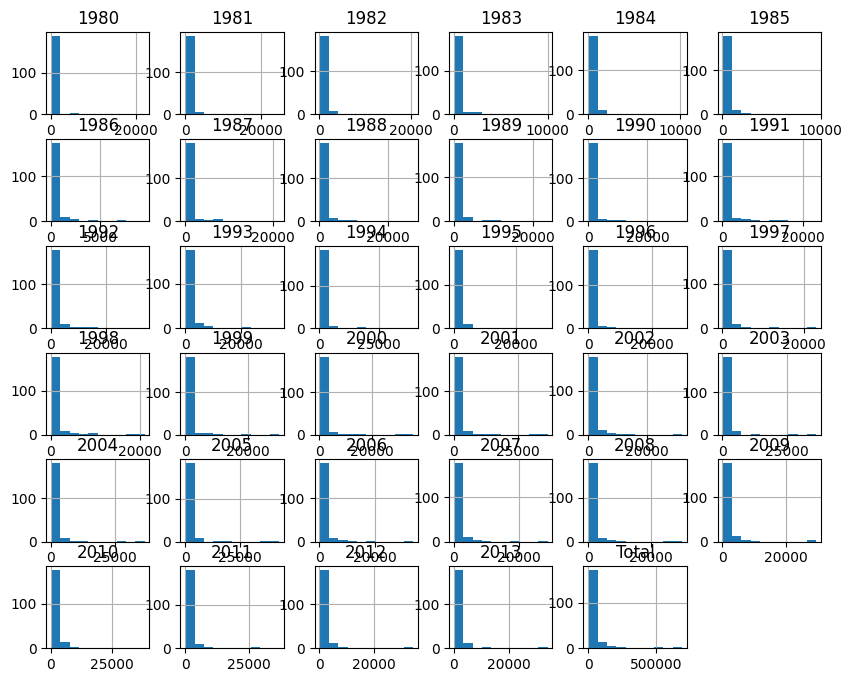

In [7]:
# Basic statistics
summary_stats = data.describe()

# Basic statistics
data.hist(figsize=(10, 8))
plt.show()


Correlation heatmap


In [8]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])


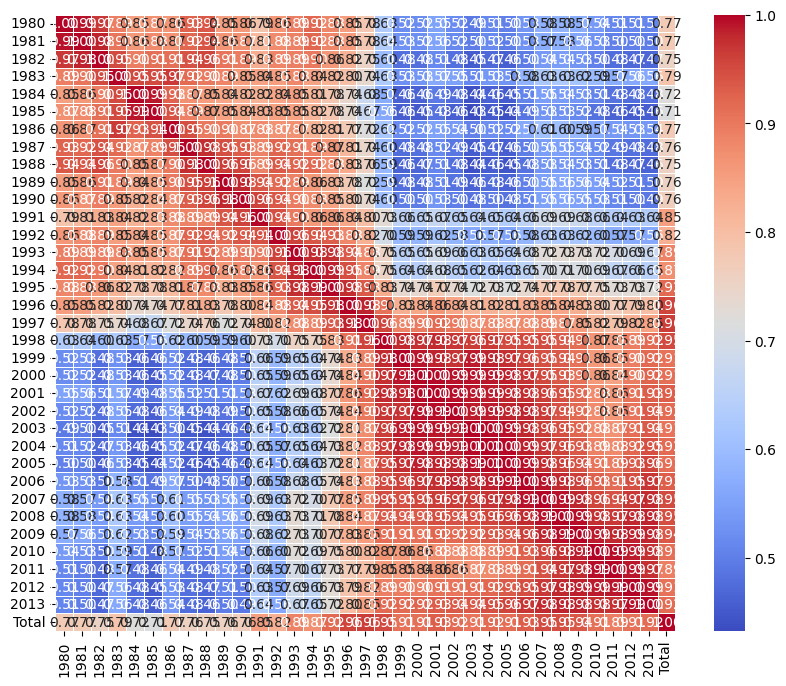

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

This part explores the data using:



1.   This part explores the data using:


2.  This part explores the data using:




3.   This part explores the data using:




# 4. Feature Engineering
We can create new features or transform existing ones, such as extracting the year or month from a datetime column if available.


In [10]:
data.columns, data.head()


(Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
        '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
        '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
        '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
        '2010', '2011', '2012', '2013', 'Total'],
       dtype='object'),
           Country Continent           Region             DevName  1980  1981  \
 0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
 1         Albania    Europe  Southern Europe   Developed regions     1     0   
 2         Algeria    Africa  Northern Africa  Developing regions    80    67   
 3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
 4         Andorra    Europe  Southern Europe   Developed regions     0     0   
 
    1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
 0    39    47    71   340  ...  3436  3009 

# 5. Hypothesis Testing
For hypothesis testing, let's assume we want to test if there is a significant difference between the 'Income' in different regions or any other variable.


# **5.1**. T-test (Independent)
A T-test is used to compare the means of two independent groups to see if there is a statistically significant difference between them.

In [11]:
data.columns


Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')

In [12]:
year_1980 = data['1980']
year_1981 = data['1981']

t_stat, p_value = stats.ttest_ind(year_1980, year_1981)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.28173465803033004, P-value: 0.7782971792422846


## 5.2. Z-test
A Z-test is used when you want to compare sample means to a population mean, assuming the sample size is large (n > 30) or the population variance is known.

In [13]:
population_mean = 50000

sample = data['Total']



In [14]:
sample_mean = np.mean(sample)
sample_std = np.std(sample)
sample_size = len(sample)

In [15]:
z_score = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))

In [16]:
p_value = stats.norm.cdf(z_score)

In [17]:
print(f"Z-score: {z_score}, P-value: {p_value}")

Z-score: -2.6132541574459016, P-value: 0.0044842290236033365


# 5.3. ANOVA (Analysis of Variance)
ANOVA is used when comparing means across more than two groups. If you want to compare the mean "Income" across multiple regions, you can use ANOVA.

In [18]:
regions = data['Region'].unique()
total_by_region = [data[data['Region'] == region]['Total'] for region in regions]

In [19]:
f_stat, p_value = stats.f_oneway(*total_by_region)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 1.7263418240330972, P-value: 0.03065250057438756


# Example using ANOVA to compare multiple years (e.g., from 1980 to 2000):

In [20]:
years = [str(year) for year in range(1980, 2001)]

data_years = [data[year] for year in years]

In [21]:
f_stat, p_value = stats.f_oneway(*data_years)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 2.0744640684807507, P-value: 0.0033376734030870023


In [22]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
df = pd.read_csv(url)

# Clean the column names (strip spaces, lowercase them)


In [23]:
df.columns = df.columns.str.strip().str.lower()


# Print column names to debug


In [24]:
print("Column Names:", df.columns)


Column Names: Index(['country', 'continent', 'region', 'devname', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'total'],
      dtype='object')


# Inspect the first few rows of the dataframe


In [25]:
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
          country continent           region             devname  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  total  
0  2635 

# Explore the Dataset for regression and correlation

In [26]:
print(data.head())
print(data.info())
print(data.describe())

          Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  1

#  Correlation Analysis
Correlation measures the relationship between two variables. You can use the corr() function in pandas to compute the correlation matrix.

           1980      1981      1982      1983      1984      1985      1986  \
1980   1.000000  0.991703  0.968006  0.893311  0.848537  0.870718  0.864686   
1981   0.991703  1.000000  0.982324  0.904120  0.858406  0.879948  0.865317   
1982   0.968006  0.982324  1.000000  0.949118  0.895561  0.909932  0.910082   
1983   0.893311  0.904120  0.949118  1.000000  0.952277  0.951551  0.965213   
1984   0.848537  0.858406  0.895561  0.952277  1.000000  0.989813  0.925161   
1985   0.870718  0.879948  0.909932  0.951551  0.989813  1.000000  0.943560   
1986   0.864686  0.865317  0.910082  0.965213  0.925161  0.943560  1.000000   
1987   0.925409  0.922400  0.944414  0.917773  0.869288  0.891233  0.948285   
1988   0.935857  0.938921  0.956887  0.899637  0.853361  0.865158  0.899459   
1989   0.850381  0.863011  0.905415  0.886979  0.840380  0.847086  0.900171   
1990   0.856323  0.869533  0.894161  0.854256  0.823266  0.836627  0.874812   
1991   0.787376  0.805831  0.828299  0.844340  0.820

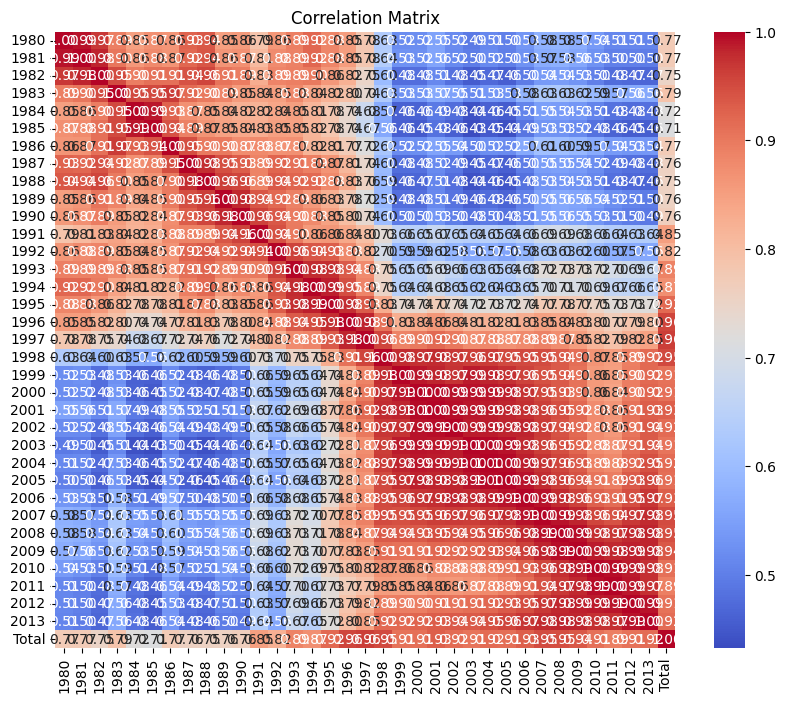

In [33]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Regression Analysis
Regression analysis is used to understand the relationship between a dependent variable and one or more independent variables. Here, we'll perform a simple linear regression.

In [37]:
# Check actual column names
print("Dataset Columns:", data.columns)

# Replace with real numeric column names from print(data.columns)
X = data[['Year']]  # Independent variable (modify if needed)
y = data['Total']   # Dependent variable (modify if needed)

# Convert to numeric and handle missing values
X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = pd.to_numeric(y, errors='coerce').loc[X.index]

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Predict using the model
y_pred = model.predict(X)

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('Year')  # Change label if needed
plt.ylabel('Total')  # Change label if needed
plt.legend()
plt.show()


Dataset Columns: Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')


KeyError: "None of [Index(['Year'], dtype='object')] are in the [columns]"

# Multiple Regression (Optional)
If you have multiple independent variables, you can perform multiple regression.



In [38]:
print(data.columns)
print(data.head())  # Check the first few rows
available_columns = [col for col in ['variable_x1', 'variable_x2', 'variable_x3'] if col in data.columns]
X = data[available_columns]
data.columns = data.columns.str.strip()


Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')
          Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  174

# Evaluate the Model (Optional)
You can evaluate the model using metrics like R-squared, Mean Squared Error (MSE), etc.



In [43]:
# Check column names
print(data.columns)

# Define X and y based on correct column names
X = data[['actual_column_name_1', 'actual_column_name_2', 'actual_column_name_3']]
y = data['actual_column_name_y']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# R-squared
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

# Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse}")


Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'Total'],
      dtype='object')


KeyError: "None of [Index(['actual_column_name_1', 'actual_column_name_2', 'actual_column_name_3'], dtype='object')] are in the [columns]"